데이터 출처
http://www.seoulmetro.co.kr/kr/board.do?menuIdx=551&bbsIdx=2207374


In [216]:
import pandas as pd
import openpyxl
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
plt.rcParams["axes.unicode_minus"] = False 
rc("font", family="Arial Unicode MS") # Windows: Malgun Gothic 
# %matplotlib inline 
get_ipython().run_line_magic("matplotlib", "inline")

In [146]:
# !pip install openpyxl

In [147]:
df_18 = pd.read_excel('18_1_12_역별일별시간대별_승하차인원.xlsx')

In [148]:
df_18 = df_18.rename(columns=df_18.iloc[0]).drop(df_18.index[0])

In [149]:
df_19 = pd.read_excel('19_1_12_역별일별시간대별_승하차인원.xlsx')
df_19 = df_19.rename(columns=df_19.iloc[0]).drop(df_19.index[0])

In [150]:
df_20 = pd.read_csv('20_1_12_역별일별시간대별_승하차인원.csv', encoding='cp949')
df_21 = pd.read_csv('21_1_11_역별일별시간대별_승하차인원.csv', encoding='cp949')
df_21.drop(columns='연번',inplace=True)

In [151]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200750 entries, 1 to 200750
Data columns (total 27 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   날짜       200750 non-null  object
 1   구분       200750 non-null  object
 2   호선       200750 non-null  object
 3   역번호      200750 non-null  object
 4   역명       200750 non-null  object
 5   구분       200750 non-null  object
 6   05 ~ 06  200750 non-null  object
 7   06 ~ 07  200750 non-null  object
 8   07 ~ 08  200750 non-null  object
 9   08 ~ 09  200750 non-null  object
 10  09 ~ 10  200750 non-null  object
 11  10 ~ 11  200750 non-null  object
 12  11 ~ 12  200750 non-null  object
 13  12 ~ 13  200750 non-null  object
 14  13 ~ 14  200750 non-null  object
 15  14 ~ 15  200750 non-null  object
 16  15 ~ 16  200750 non-null  object
 17  16 ~ 17  200750 non-null  object
 18  17 ~ 18  200750 non-null  object
 19  18 ~ 19  200750 non-null  object
 20  19 ~ 20  200750 non-null  object
 21  20 ~ 21  2

In [152]:
df_18['날짜'] # 날짜 데이터 Datetime 형태로 변환
df_18['날짜'] = pd.to_datetime(df_18['날짜'])
df_19['날짜'] = pd.to_datetime(df_19['날짜'])
df_20['날짜'] = pd.to_datetime(df_20['날짜'])
df_21['날짜'] = pd.to_datetime(df_21['날짜'])

1         2018-01-01 00:00:00
2         2018-01-01 00:00:00
3         2018-01-01 00:00:00
4         2018-01-01 00:00:00
5         2018-01-01 00:00:00
                 ...         
200746    2018-12-31 00:00:00
200747    2018-12-31 00:00:00
200748    2018-12-31 00:00:00
200749    2018-12-31 00:00:00
200750    2018-12-31 00:00:00
Name: 날짜, Length: 200750, dtype: object

In [153]:
# 요일 추가
df_18['요일'] = df_18['날짜'].dt.day_name()
df_19['요일'] = df_19['날짜'].dt.day_name()
df_20['요일'] = df_20['날짜'].dt.day_name()
df_21['요일'] = df_21['날짜'].dt.day_name()

In [154]:
df_18.head(1)

,날짜,구분,호선,역번호,역명,구분,05 ~ 06,06 ~ 07,07 ~ 08,08 ~ 09,...,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,00 ~ 01,합 계,요일
1,2018-01-01,휴,1호선,150,서울역,승차,373,318,365,785,...,3891,3227,2945,2382,3070,1750,781,96,40393,Monday


In [155]:
df_18.keys()
len(df_19.keys())
df_19.keys()
len(df_19.keys())
df_20.keys()
len(df_20.keys())
df_21.keys()
len(df_21.keys())
# columns = ('날짜','요일','호선','역번호','역명','~ 06','06 ~ 07', '07 ~ 08',
#       '08 ~ 09', '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13', '13 ~ 14',
#       '14 ~ 15', '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19', '19 ~ 20',
#       '20 ~ 21', '21 ~ 22', '22 ~ 23', '23 ~') 

Index(['날짜', '구분', '호선', '역번호', '역명', '구분', '05 ~ 06', '06 ~ 07', '07 ~ 08',
       '08 ~ 09', '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13', '13 ~ 14',
       '14 ~ 15', '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19', '19 ~ 20',
       '20 ~ 21', '21 ~ 22', '22 ~ 23', '23 ~ 24', '00 ~ 01', '합 계', '요일'],
      dtype='object')

27

Index(['날짜', '호선', '역번호', '역명', '구분', '06시 이전', '06 ~ 07', '07 ~ 08',
       '08 ~ 09', '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13', '13 ~ 14',
       '14 ~ 15', '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19', '19 ~ 20',
       '20 ~ 21', '21 ~ 22', '22 ~ 23', '23 ~ 24', '24시 이후', '합 계', '요일'],
      dtype='object')

27

Index(['날짜', '호선', '역번호', '역명', '구분', '06:00 이전', '06:00 ~ 07:00',
       '07:00 ~ 08:00', '08:00 ~ 09:00', '09:00 ~ 10:00', '10:00 ~ 11:00',
       '11:00 ~ 12:00', '12:00 ~ 13:00', '13:00 ~ 14:00', '14:00 ~ 15:00',
       '15:00 ~ 16:00', '16:00 ~ 17:00', '17:00 ~ 18:00', '18:00 ~ 19:00',
       '19:00 ~ 20:00', '20:00 ~ 21:00', '21:00 ~ 22:00', '22:00 ~ 23:00',
       '23:00 ~ 24:00', '24:00 이후', '요일'],
      dtype='object')

26

Index(['날짜', '호선', '역번호', '역명', '구분', '06시 이전', '06시-07시', '07시-08시',
       '08시-09시', '09시-10시', '10시-11시', '11시-12시', '12시-13시', '13시-14시',
       '14시-15시', '15시-16시', '16시-17시', '17시-18시', '18시-19시', '19시-20시',
       '20시-21시', '21시-22시', '22시-23시', '23시 이후', '요일'],
      dtype='object')

25

In [156]:
#df_18 인덱스 정리
df_18.rename(columns={'05 ~ 06':'~ 06'}, inplace=True)
df_18['23 ~'] = df_18['23 ~ 24'] + df_18['00 ~ 01']
df_18.drop(columns=['구분','23 ~ 24', '00 ~ 01','합 계'],inplace=True)
df_18.keys()
len(df_18.keys())

Index(['날짜', '호선', '역번호', '역명', '~ 06', '06 ~ 07', '07 ~ 08', '08 ~ 09',
       '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13', '13 ~ 14', '14 ~ 15',
       '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19', '19 ~ 20', '20 ~ 21',
       '21 ~ 22', '22 ~ 23', '요일', '23 ~'],
      dtype='object')

24

In [157]:
#df_19 인덱스 정리
df_19.rename(columns={'06시 이전':'~ 06'}, inplace=True)
df_19['23 ~'] = df_19['23 ~ 24'] + df_19['24시 이후'] 
df_19.drop(columns=['구분','23 ~ 24', '24시 이후', '합 계'],inplace=True)
df_19.keys()
len(df_18.keys())

Index(['날짜', '호선', '역번호', '역명', '~ 06', '06 ~ 07', '07 ~ 08', '08 ~ 09',
       '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13', '13 ~ 14', '14 ~ 15',
       '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19', '19 ~ 20', '20 ~ 21',
       '21 ~ 22', '22 ~ 23', '요일', '23 ~'],
      dtype='object')

24

In [158]:
df_19.keys()[5:-2]
len(df_19.keys()[5:-2])
df_20.keys()[6:-3]
len(df_20.keys()[6:-3])

Index(['06 ~ 07', '07 ~ 08', '08 ~ 09', '09 ~ 10', '10 ~ 11', '11 ~ 12',
       '12 ~ 13', '13 ~ 14', '14 ~ 15', '15 ~ 16', '16 ~ 17', '17 ~ 18',
       '18 ~ 19', '19 ~ 20', '20 ~ 21', '21 ~ 22', '22 ~ 23'],
      dtype='object')

17

Index(['06:00 ~ 07:00', '07:00 ~ 08:00', '08:00 ~ 09:00', '09:00 ~ 10:00',
       '10:00 ~ 11:00', '11:00 ~ 12:00', '12:00 ~ 13:00', '13:00 ~ 14:00',
       '14:00 ~ 15:00', '15:00 ~ 16:00', '16:00 ~ 17:00', '17:00 ~ 18:00',
       '18:00 ~ 19:00', '19:00 ~ 20:00', '20:00 ~ 21:00', '21:00 ~ 22:00',
       '22:00 ~ 23:00'],
      dtype='object')

17

In [159]:
#df_20 인덱스 정리 (1)
after_ls = df_19.keys()[5:-2]
before_ls = df_20.keys()[6:-3]
for i in range(len(after_ls)):
    df_20.rename(columns={before_ls[i]:after_ls[i]}, inplace=True)
df_20.keys()

Index(['날짜', '호선', '역번호', '역명', '구분', '06:00 이전', '06 ~ 07', '07 ~ 08',
       '08 ~ 09', '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13', '13 ~ 14',
       '14 ~ 15', '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19', '19 ~ 20',
       '20 ~ 21', '21 ~ 22', '22 ~ 23', '23:00 ~ 24:00', '24:00 이후', '요일'],
      dtype='object')

In [160]:
#df_20 인덱스 정리 (2)
df_20.rename(columns={'06:00 이전':'~ 06'}, inplace=True)
df_20['23 ~'] = df_20['23:00 ~ 24:00'] + df_20['24:00 이후'] 
df_20.drop(columns=['구분','23:00 ~ 24:00', '24:00 이후'],inplace=True)
df_20.keys()
len(df_20.keys())

Index(['날짜', '호선', '역번호', '역명', '~ 06', '06 ~ 07', '07 ~ 08', '08 ~ 09',
       '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13', '13 ~ 14', '14 ~ 15',
       '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19', '19 ~ 20', '20 ~ 21',
       '21 ~ 22', '22 ~ 23', '요일', '23 ~'],
      dtype='object')

24

In [161]:
after_ls = df_19.keys()[4:-2]
after_ls
len(after_ls)
before_ls = df_21.keys()[5:-2]
before_ls
len(before_ls)

Index(['~ 06', '06 ~ 07', '07 ~ 08', '08 ~ 09', '09 ~ 10', '10 ~ 11',
       '11 ~ 12', '12 ~ 13', '13 ~ 14', '14 ~ 15', '15 ~ 16', '16 ~ 17',
       '17 ~ 18', '18 ~ 19', '19 ~ 20', '20 ~ 21', '21 ~ 22', '22 ~ 23'],
      dtype='object')

18

Index(['06시 이전', '06시-07시', '07시-08시', '08시-09시', '09시-10시', '10시-11시',
       '11시-12시', '12시-13시', '13시-14시', '14시-15시', '15시-16시', '16시-17시',
       '17시-18시', '18시-19시', '19시-20시', '20시-21시', '21시-22시', '22시-23시'],
      dtype='object')

18

In [162]:
#df_21 인덱스 정리 (1)
for i in range(len(after_ls)):
    df_21.rename(columns={before_ls[i]:after_ls[i]}, inplace=True)
df_21.keys()

Index(['날짜', '호선', '역번호', '역명', '구분', '~ 06', '06 ~ 07', '07 ~ 08', '08 ~ 09',
       '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13', '13 ~ 14', '14 ~ 15',
       '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19', '19 ~ 20', '20 ~ 21',
       '21 ~ 22', '22 ~ 23', '23시 이후', '요일'],
      dtype='object')

In [163]:
#df_21 인덱스 정리 (2)
df_21.rename(columns={'23시 이후':'23 ~'}, inplace=True)
df_21.drop(columns=['구분'],inplace=True)
df_21.keys()
len(df_21.keys())

Index(['날짜', '호선', '역번호', '역명', '~ 06', '06 ~ 07', '07 ~ 08', '08 ~ 09',
       '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13', '13 ~ 14', '14 ~ 15',
       '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19', '19 ~ 20', '20 ~ 21',
       '21 ~ 22', '22 ~ 23', '23 ~', '요일'],
      dtype='object')

24

In [174]:
len(df_18)
len(df_19)
len(df_20)
len(df_21)

200750

200804

202280

186952

790786

In [175]:
df_18_21 = pd.concat([df_18,df_19,df_20,df_21])
df_18_21.to_csv("18_21_요일_시간별_지하철_승객수.csv")
df_18_21.keys()
len(df_18_21)

Index(['날짜', '호선', '역번호', '역명', '~ 06', '06 ~ 07', '07 ~ 08', '08 ~ 09',
       '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13', '13 ~ 14', '14 ~ 15',
       '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19', '19 ~ 20', '20 ~ 21',
       '21 ~ 22', '22 ~ 23', '요일', '23 ~'],
      dtype='object')

---

## 요일별 시간대별 승객수의 평균 계산하기

In [235]:
# df_18_wd_tm : 18년의 요일-시간 승객수의 평균
df_18_wd_tm = df_18.groupby(['요일'],as_index=False).mean().drop(columns = ['역번호','날짜'])

/var/folders/hr/y8znbyhd4058w4d5l14qqsv80000gn/T/ipykernel_14372/371008097.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  df_18_wd_tm = df_18.groupby(['요일'],as_index=False).mean().drop(columns = ['역번호','날짜'])


In [236]:
df_18_wd_tm.set_index('요일', inplace=True)

In [237]:
index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_18_wd_tm = df_18_wd_tm.reindex(index=index)
df_18_wd_tm

,~ 06,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,12 ~ 13,13 ~ 14,14 ~ 15,15 ~ 16,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~
요일,,,,,,,,,,,,,,,,,,,
Monday,156.946621,458.412419,1271.225077,2163.001578,1261.436741,785.726758,741.761098,760.005832,811.002024,801.202436,876.942985,993.171595,1245.317358,1975.177221,1425.995129,893.678628,803.883328,699.267616,503.238731
Tuesday,151.286399,439.403147,1234.072308,2158.059091,1287.953217,803.985944,755.064580,773.959860,838.913671,821.654301,886.778986,1014.479720,1281.435804,1989.974615,1423.664021,909.773566,847.798252,756.663497,530.258427
Wednesday,151.216993,434.051224,1214.411119,2150.432797,1285.772238,807.256538,758.273566,782.419685,847.442937,831.472378,901.675524,1025.319930,1312.631888,2026.534021,1411.748566,900.144406,850.316469,767.624510,545.965000
Thursday,153.623147,447.231643,1265.639650,2233.368007,1333.868531,815.662098,761.074196,777.983287,841.136049,821.481154,893.417657,1026.808007,1312.896993,2051.330175,1437.960210,919.488671,879.113322,803.881888,587.139161
Friday,154.357832,441.446888,1246.566853,2218.439965,1314.738427,816.695140,772.086573,808.675070,881.510420,878.370594,968.948427,1106.272413,1427.941678,2212.679056,1601.905874,971.418427,876.393427,846.917133,738.389510
Saturday,139.343811,293.804126,389.075804,663.897797,804.434336,776.743287,885.871189,1014.878217,1093.572762,1074.619266,1080.397273,1176.721119,1253.041538,1120.281154,848.629790,740.041399,724.259266,667.260839,451.707168
Sunday,88.805315,190.347028,228.745734,383.095140,553.726608,599.990210,622.700420,717.706748,800.871469,791.667203,802.748497,846.811573,846.929476,783.124196,648.891119,583.806888,553.464406,459.477343,267.086608


### 18년 요일별 시간별 히트맵 승객 수

<Figure size 2160x360 with 0 Axes>

<AxesSubplot:ylabel='요일'>

Text(0.5, 1.0, '2018년 요일별 시간별 히트맵 승객 수')

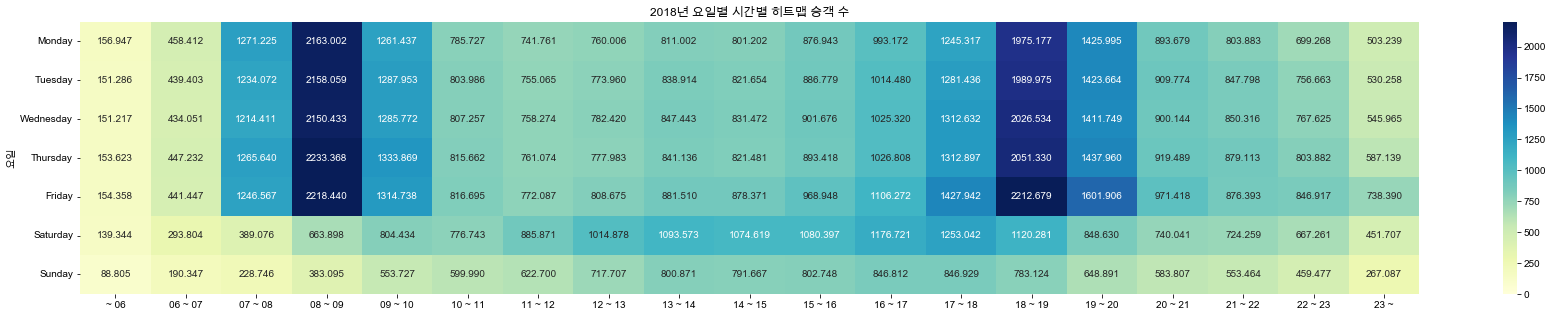

In [258]:
plt.figure(figsize=(30,5))
sns.heatmap(data = df_18_wd_tm,
            cmap='YlGnBu',
            annot=True,
            fmt = '.3f',
            vmin=0,
            vmax=2200)
plt.title("2018년 요일별 시간별 히트맵 승객 수")
plt.show()

---

In [241]:
# df_19_wd_tm : 19년의 요일-시간 승객수의 평균
df_19_wd_tm = df_19.groupby(['요일'],as_index=False).mean().drop(columns = ['역번호','날짜'])
df_19_wd_tm.set_index('요일', inplace=True)
index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_19_wd_tm = df_19_wd_tm.reindex(index=index)
df_19_wd_tm

/var/folders/hr/y8znbyhd4058w4d5l14qqsv80000gn/T/ipykernel_14372/3026898078.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  df_19_wd_tm = df_19.groupby(['요일'],as_index=False).mean().drop(columns = ['역번호','날짜'])


,~ 06,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,12 ~ 13,13 ~ 14,14 ~ 15,15 ~ 16,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~
요일,,,,,,,,,,,,,,,,,,,
Monday,159.686543,459.494477,1285.292870,2244.732786,1316.879378,810.984935,758.209927,777.173611,827.072702,815.705592,894.068228,1012.177525,1304.146907,2063.960154,1403.173471,880.392240,802.231003,689.897693,464.180077
Tuesday,155.468103,445.257580,1267.180066,2269.428797,1345.788997,823.562560,764.548395,782.205035,845.407017,828.560228,902.507717,1041.864899,1350.009398,2093.767595,1415.237584,898.807038,840.902353,751.845555,526.376218
Wednesday,153.058554,432.472104,1216.788960,2200.544431,1318.482906,823.476054,771.689715,801.849332,866.617178,854.083444,930.760330,1058.138537,1372.362721,2098.724848,1396.481682,890.169790,844.057820,755.084563,541.124624
Thursday,153.769190,432.419813,1201.247728,2175.652894,1321.948406,824.534885,776.868219,799.321239,865.239094,849.701482,920.719729,1052.347630,1356.294952,2057.337318,1385.133319,902.045267,865.025867,782.085850,565.295442
Friday,155.573126,430.916457,1195.314457,2177.249196,1316.941450,831.274678,791.281565,831.219973,903.660654,903.310123,997.449035,1141.192499,1488.848189,2229.073511,1531.065856,944.744582,861.689667,823.155306,710.709906
Saturday,137.168589,286.803482,379.408977,649.535410,799.742275,790.095358,904.310997,1036.190366,1112.863954,1090.510766,1104.182676,1201.546036,1260.164884,1111.126154,844.473993,748.577461,734.479901,663.293519,441.778244
Sunday,86.150343,186.833438,230.116366,385.252936,557.523105,616.530236,637.172050,729.149399,814.440506,803.527020,815.139506,852.648001,851.141953,783.361962,649.695749,585.813339,547.572602,449.150133,263.868953


### 19년 요일별 시간별 히트맵 승객수

<Figure size 2160x360 with 0 Axes>

<AxesSubplot:ylabel='요일'>

Text(0.5, 1.0, '2019년 요일별 시간별 히트맵 승객 수')

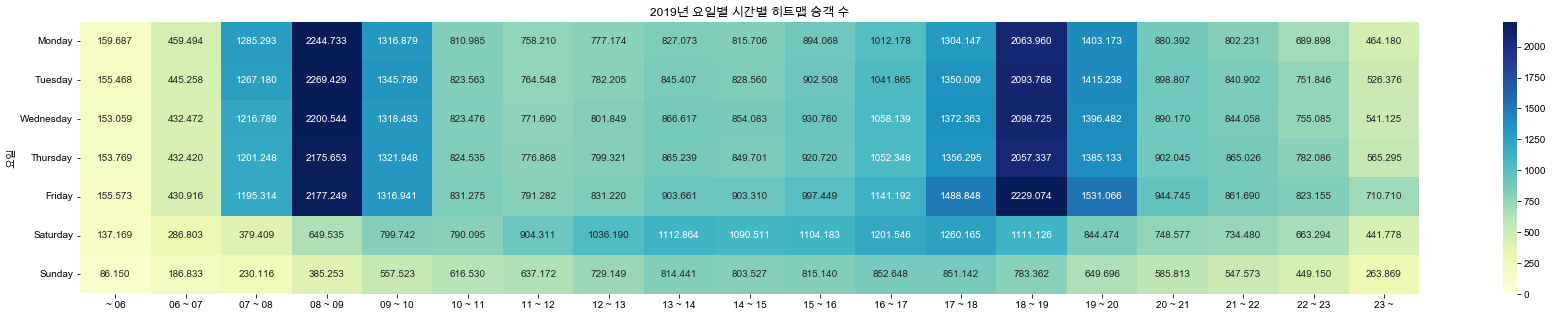

In [259]:
plt.figure(figsize=(30,5))
sns.heatmap(data = df_19_wd_tm,
            cmap='YlGnBu',
            annot=True,
            fmt = '.3f',
            vmin=0,
            vmax=2200)
plt.title("2019년 요일별 시간별 히트맵 승객 수")
plt.show()

---

In [246]:
# df_20_wd_tm : 20년의 요일-시간 승객수의 평균
df_20_wd_tm = df_20.groupby(['요일'],as_index=False).mean().drop(columns = ['역번호'])
df_20_wd_tm.set_index('요일', inplace=True)
index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_20_wd_tm = df_20_wd_tm.reindex(index=index)
df_20_wd_tm

,~ 06,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,12 ~ 13,13 ~ 14,14 ~ 15,15 ~ 16,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~
요일,,,,,,,,,,,,,,,,,,,
Monday,136.963764,391.391223,1065.299485,1830.372061,1054.294825,582.401621,521.945577,535.370357,578.437057,582.384511,642.352066,726.274864,1038.040826,1701.919391,1091.256920,649.733795,555.589234,433.470476,239.525595
Tuesday,134.286838,384.339702,1066.594731,1872.592678,1081.863054,594.141192,529.766618,540.904956,589.072771,591.313322,652.716433,746.878158,1070.954061,1736.249252,1102.072875,667.130264,592.978318,474.234322,267.903076
Wednesday,133.440811,374.967333,1024.790825,1808.429274,1049.531335,586.561476,527.218460,543.003550,591.003209,593.073457,650.913196,742.268228,1074.666746,1720.542702,1079.969381,653.532530,588.957776,477.817961,277.455182
Thursday,132.382738,374.102894,1024.249369,1814.543103,1058.587844,586.869224,527.959047,544.233807,594.785714,599.633301,662.941472,759.961709,1081.020852,1699.842536,1072.418128,659.659443,600.544093,493.083885,290.690670
Friday,130.355995,359.784740,960.648598,1699.745425,1011.110918,587.273015,540.409749,563.100480,611.454422,622.990258,688.635029,795.603264,1134.762195,1735.259133,1106.635446,656.772284,581.174796,505.165890,342.425858
Saturday,104.054337,210.265734,269.969994,446.909496,532.285471,506.368700,557.940929,633.603383,677.493630,667.669277,669.856307,722.015316,751.516708,656.230994,492.861703,445.993978,437.681530,373.598162,231.117481
Sunday,59.558387,124.561138,149.764466,245.745596,339.829469,346.142434,356.018209,434.151626,476.154690,472.412854,480.753395,504.734629,508.073150,469.295801,389.095641,367.319059,348.191421,269.154411,152.463965


### 20년 요일별 시간별 히트맵 승객수

<Figure size 2160x360 with 0 Axes>

<AxesSubplot:ylabel='요일'>

Text(0.5, 1.0, '2020년 요일별 시간별 히트맵 승객 수')

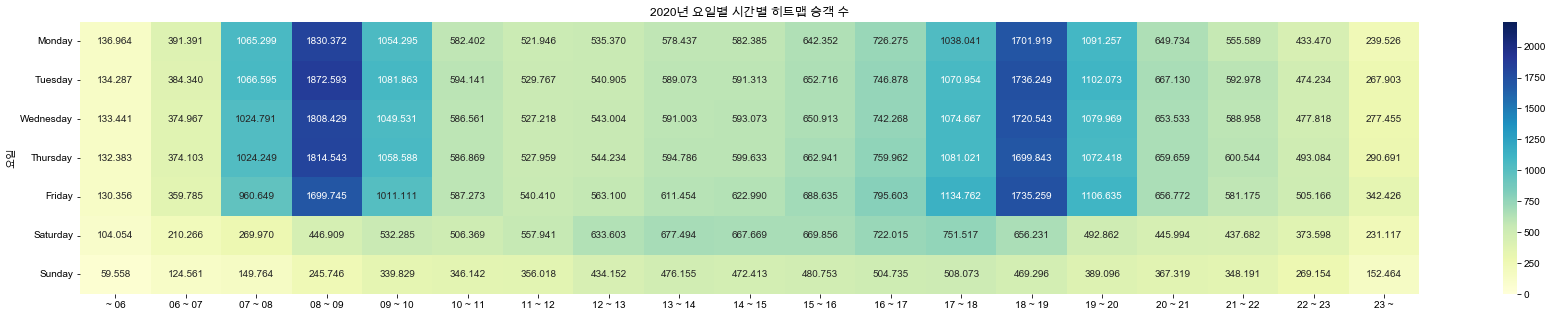

In [260]:
plt.figure(figsize=(30,5))
sns.heatmap(data = df_20_wd_tm,
            cmap='YlGnBu',
            annot=True,
            fmt = '.3f',
            vmin=0,
            vmax=2200)
plt.title("2020년 요일별 시간별 히트맵 승객 수")
plt.show()

---

In [261]:
# df_21_wd_tm : 21년의 요일-시간 승객수의 평균
df_21_wd_tm = df_21.groupby(['요일'],as_index=False).mean().drop(columns = ['역번호'])
df_21_wd_tm.set_index('요일', inplace=True)
index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_21_wd_tm = df_21_wd_tm.reindex(index=index)
df_21_wd_tm

,~ 06,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,12 ~ 13,13 ~ 14,14 ~ 15,15 ~ 16,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~
요일,,,,,,,,,,,,,,,,,,,
Monday,131.335703,379.780292,1015.255582,1715.519574,991.239096,573.968964,523.276980,540.776459,571.742781,574.924494,637.282487,730.718369,1026.002233,1610.497246,990.772179,595.744120,537.315458,414.365473,144.273072
Tuesday,131.424760,387.843269,1072.561286,1845.399494,1059.463124,599.322617,537.110590,549.770187,583.677383,584.777852,648.832924,762.057565,1090.704436,1718.186835,1043.243618,632.122944,590.981134,477.663950,163.785741
Wednesday,130.324715,376.598175,1023.987757,1768.155019,1028.339011,598.234639,544.890418,565.707909,602.723840,604.318479,669.639848,775.472928,1102.570608,1678.882776,1009.928783,626.247681,602.179430,492.898669,172.021255
Thursday,133.395965,388.115966,1058.363249,1819.817007,1057.581465,607.428490,545.169200,559.582225,596.669010,597.163538,661.202713,774.894901,1102.838438,1702.677521,1024.056539,632.909302,606.590166,508.802455,175.530397
Friday,128.403601,369.033150,998.116787,1722.851589,1004.516817,596.650644,551.475370,576.249609,616.268286,631.112248,709.366471,832.570801,1175.979537,1728.356611,1028.764194,612.083488,593.459223,541.336595,202.777625
Saturday,96.159781,203.136668,271.727669,454.364746,544.275830,536.492333,603.237011,682.705449,715.831845,696.786140,698.310927,748.635328,754.810444,634.220188,460.980051,423.699754,454.025644,389.807689,145.789229
Sunday,52.431227,117.279450,150.546643,252.423776,348.362231,369.988637,396.783474,483.190336,512.530735,503.931525,514.015945,537.095783,536.451866,481.218948,386.615751,365.472841,363.569220,280.816891,108.363088


### 21년 요일별 시간별 히트맵 승객수

<Figure size 2160x360 with 0 Axes>

<AxesSubplot:ylabel='요일'>

Text(0.5, 1.0, '2021년 요일별 시간별 히트맵 승객 수')

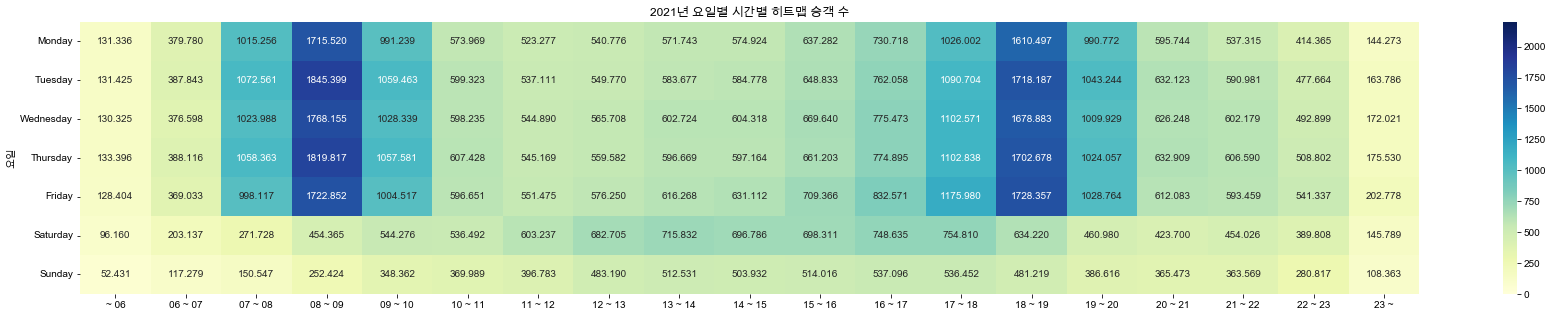

In [263]:
plt.figure(figsize=(30,5))
sns.heatmap(data = df_21_wd_tm,
            cmap='YlGnBu',
            annot=True,
            fmt = '.3f',
            vmin=0,
            vmax=2200)
plt.title("2021년 요일별 시간별 히트맵 승객 수")
plt.show()

---

### 코로나 이전 (18, 19년) / 코로나 이후 (20, 21년) 비교

In [264]:
df_covid_before = pd.concat([df_18, df_19])
df_covid_after = pd.concat([df_20, df_21])

In [268]:
# df_before_wd_tm : 코로나 발생 이전의 요일-시간 승객수의 평균
df_before_wd_tm = df_covid_before.groupby(['요일'],as_index=False).mean().drop(columns = ['역번호','날짜'])
df_before_wd_tm.set_index('요일', inplace=True)
index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_before_wd_tm = df_before_wd_tm.reindex(index=index)
df_before_wd_tm

/var/folders/hr/y8znbyhd4058w4d5l14qqsv80000gn/T/ipykernel_14372/435128378.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  df_before_wd_tm = df_covid_before.groupby(['요일'],as_index=False).mean().drop(columns = ['역번호','날짜'])


,~ 06,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,12 ~ 13,13 ~ 14,14 ~ 15,15 ~ 16,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~
요일,,,,,,,,,,,,,,,,,,,
Monday,158.303774,458.948390,1278.193213,2203.485128,1288.898892,798.237777,749.908622,768.509470,818.962240,808.386219,885.425554,1002.585717,1274.457133,2019.153670,1414.690980,887.097542,803.064889,694.626454,483.891984
Tuesday,153.397379,442.358543,1250.785546,2214.280006,1317.149491,813.868481,759.852137,778.122134,842.191599,825.140505,894.719059,1028.304124,1316.052670,2042.370697,1419.410243,904.237516,844.317110,754.231335,528.298636
Wednesday,152.137870,433.261581,1215.600164,2175.491242,1302.129287,815.367147,764.982345,792.135528,857.031063,842.779097,916.219453,1041.730955,1342.500437,2062.633220,1404.114324,895.156574,847.186816,761.353879,543.544558
Thursday,153.696179,439.824692,1233.439187,2204.506415,1327.907635,820.099112,768.972312,788.653755,853.189257,835.593291,907.070602,1039.579604,1334.599007,2054.334167,1411.543071,910.765750,872.068609,792.982345,576.215774
Friday,154.965564,436.180936,1220.937072,2197.841700,1315.840092,823.985929,781.685411,819.949098,892.587086,890.842103,983.200724,1123.734897,1458.399192,2220.877430,1566.480912,958.079639,869.040519,835.034558,724.547773
Saturday,138.256048,290.303314,384.241714,656.715599,802.087977,783.420256,895.092382,1025.535782,1103.219707,1082.566127,1092.291638,1189.135313,1256.603709,1115.703014,846.551601,744.310027,729.370298,665.276902,446.742012
Sunday,87.477643,188.589987,229.431146,384.174189,555.625122,608.261380,629.937247,723.428874,807.656936,797.597941,808.944868,849.730195,849.036009,783.243095,649.293490,584.810254,550.518092,454.313016,265.477556


<Figure size 2160x360 with 0 Axes>

<AxesSubplot:ylabel='요일'>

Text(0.5, 1.0, '코로나 발생 전(18, 19년) 요일별 시간별 히트맵 승객 수')

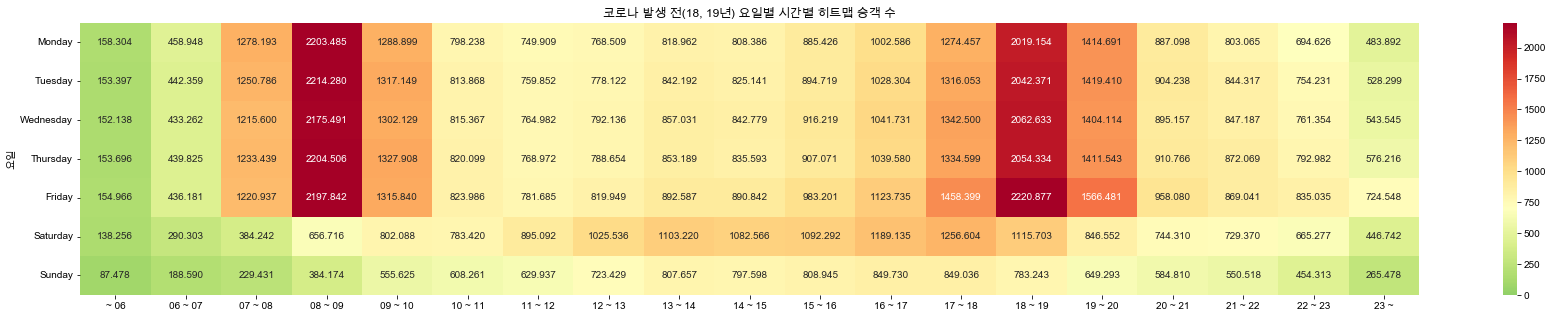

In [284]:
plt.figure(figsize=(30,5))
sns.heatmap(data = df_before_wd_tm,
            cmap='RdYlGn_r',
            annot=True,
            fmt = '.3f',
            center=700,
            vmin=0,
            vmax=2200)
plt.title("코로나 발생 전(18, 19년) 요일별 시간별 히트맵 승객 수")
plt.show()

In [272]:
# df_after_wd_tm : 코로나 발생 이후의 요일-시간 승객수의 평균
df_after_wd_tm = df_covid_after.groupby(['요일'],as_index=False).mean().drop(columns = ['역번호'])
df_after_wd_tm.set_index('요일', inplace=True)
index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_after_wd_tm = df_after_wd_tm.reindex(index=index)
df_after_wd_tm

,~ 06,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,12 ~ 13,13 ~ 14,14 ~ 15,15 ~ 16,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~
요일,,,,,,,,,,,,,,,,,,,
Monday,134.245038,385.782376,1041.124973,1774.890721,1023.834741,578.328090,522.588732,537.981862,575.203279,578.780830,639.903124,728.421371,1032.225390,1657.756454,1042.716150,623.653214,546.761793,424.241497,193.512332
Tuesday,132.903665,386.032891,1069.478223,1859.450870,1071.037710,596.645249,533.315782,545.189307,586.465311,588.154888,650.839627,754.213998,1080.498939,1727.520123,1073.642120,650.212074,592.013128,475.891778,217.585689
Wednesday,131.966724,375.738812,1024.410929,1789.377311,1039.506187,592.083531,535.578279,553.743974,596.547719,598.392978,659.771944,757.975898,1087.866825,1700.835240,1046.836283,640.625279,595.212353,484.951975,227.579070
Thursday,132.862172,380.733531,1040.391208,1817.038583,1058.111650,596.597357,536.102463,551.496296,595.676843,598.464671,662.118734,767.027724,1091.344391,1701.183981,1049.534628,647.001942,603.404944,500.521521,236.199694
Friday,129.412513,364.253973,978.754854,1710.911327,1007.924362,591.804693,545.757138,569.454711,613.780690,626.915156,698.653362,813.467584,1154.680205,1731.923535,1069.004675,635.176717,587.111165,522.645146,274.941766
Saturday,100.239118,206.820455,270.819429,450.512411,538.080078,520.926613,579.831265,657.333046,696.021422,681.740647,683.607634,734.880027,753.108479,645.593784,477.454187,435.219800,445.580186,381.431776,189.880711
Sunday,56.115380,121.043481,150.142322,248.971708,343.951497,357.662119,375.711198,457.841372,493.727323,487.638975,496.821953,520.367738,521.782413,475.055666,387.897650,366.427183,355.620168,274.788352,131.159600


<Figure size 2160x360 with 0 Axes>

<AxesSubplot:ylabel='요일'>

Text(0.5, 1.0, '코로나 발생 후(20, 21년) 요일별 시간별 히트맵 승객 수')

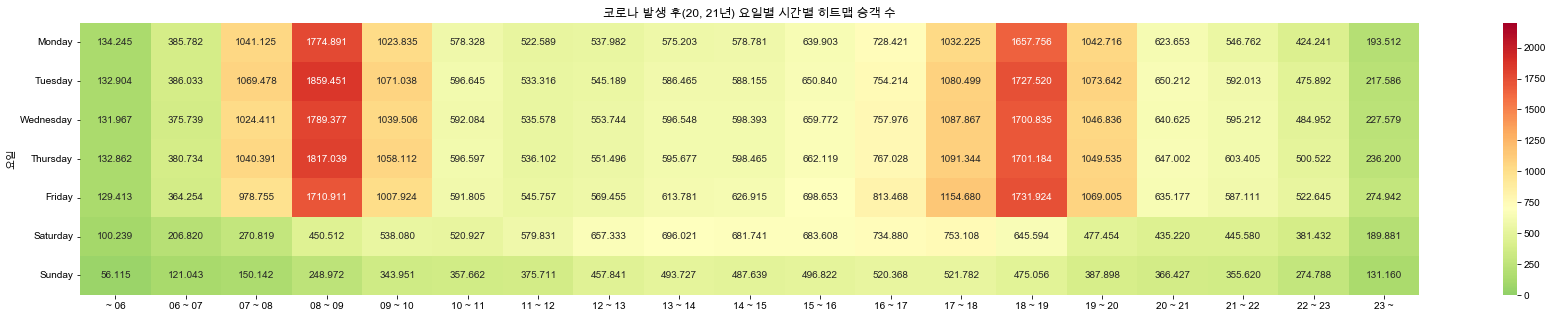

In [285]:
plt.figure(figsize=(30,5))
sns.heatmap(data = df_after_wd_tm,
            cmap='RdYlGn_r',
            annot=True,
            fmt = '.3f',
            center=700,
            vmin=0,
            vmax=2200)
plt.title("코로나 발생 후(20, 21년) 요일별 시간별 히트맵 승객 수")
plt.show()

# 감소율 그리기